[ 0.65404748  0.32810896  0.31013752 ...,  0.41215371  0.35719633
  0.29906729]
[ 1.39661509  0.67912253  0.62189652 ...,  0.85421112  0.87399225
  0.60501539]
[ 1.34704482  1.4972717   1.43066205 ...,  1.09862024  1.00986927
  1.36506346]


/home/karthik/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


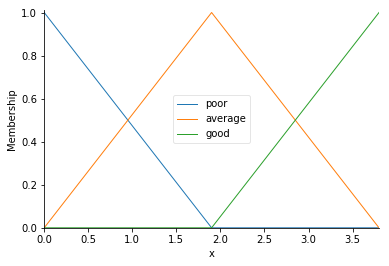

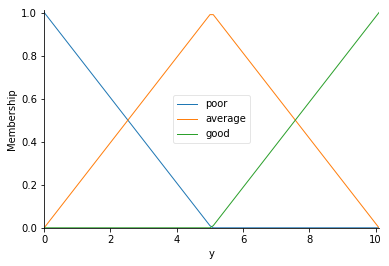

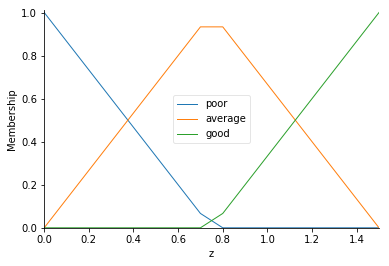

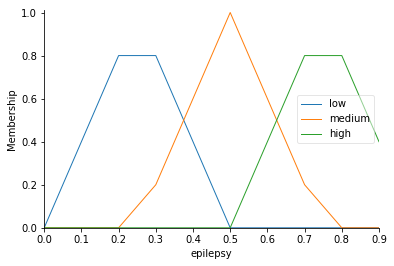

ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv("/home/karthik/Desktop/Epilepsy detection/LDA1.csv")
ytrue = np.array(dataset)[:,3]

dataset_X = dataset.iloc[:, 0].values
dataset_Y = dataset.iloc[:, 1].values
dataset_Z = dataset.iloc[:, 2].values

print(dataset_X)
print(dataset_Y)
print(dataset_Z)



x = ctrl.Antecedent(np.arange(0,3.85,0.1), 'x')
y = ctrl.Antecedent(np.arange(0,10.2,0.1), 'y')
z = ctrl.Antecedent(np.arange(0,1.6,0.1), 'z')

epilepsy = ctrl.Consequent(np.arange(0, 1, 0.1), 'epilepsy')
x.automf(3)
y.automf(3)
z.automf(3)

x.view()
y.view()
z.view()
plt.show()

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
epilepsy['low'] = fuzz.trimf(epilepsy.universe, [0, 0.25, 0.5])
epilepsy['medium'] = fuzz.trimf(epilepsy.universe, [0.25, 0.5, 0.75])
epilepsy['high'] = fuzz.trimf(epilepsy.universe, [0.5, 0.75, 1])

# You can see how these look with .view()

epilepsy.view()
plt.show()


rule1 = ctrl.Rule(x['poor'] & y['poor'] & z['good'], epilepsy['low'])
#rule2 = ctrl.Rule(z['average']| x['average'] | y['average'] , epilepsy['medium'])
rule3 = ctrl.Rule(x['average'] & y['poor'] & z['good'], epilepsy['high'])
#rule1.view()

epilepsyping_ctrl = ctrl.ControlSystem([rule1,rule3])

epilepsyping = ctrl.ControlSystemSimulation(epilepsyping_ctrl)



# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)


#out_1 = np.where(out > 0,1,-1)
#out_1 = out_1.T
#np.savetxt("foo_4.csv", out_1, delimiter=",")

pred = np.zeros(dataset_X.size)
correct = 0
#for i in range(0,dataset_x.size):
for i in range(0,len(dataset_X)):
    epilepsyping.input['x'] = dataset_X[i]
    epilepsyping.input['y'] = dataset_Y[i]
    epilepsyping.input['z'] = dataset_Z[i]
    epilepsyping.compute()
    pred[i]=epilepsyping.output['epilepsy']
    if pred[i] > 0.5:
        pred[i] = 1
        #print('1')
        #print(ytrue[i])
    else:
        pred[i] = 0
        #print('0')
    if int(pred[i]) == int(ytrue[i]):
        correct = correct + 1
print((100*correct/len(dataset_X)))
        
        

#print(ccc,"result")

#dataset_check = pd.read_csv("foo_4.csv")

#dataset_true = dataset_check.iloc[:, 0].values
#dataset_pred = dataset_check.iloc[:, 1].values
#from sklearn.metrics import accuracy_score,confusion_matrix
#print(confusion_matrix(y_test,predictions))

#print(confusion_matrix(dataset_true,dataset_pred))
#print(accuracy_score(dataset_true,dataset_pred)*100)



print(epilepsyping.output['epilepsy'])
epilepsy.view(sim=epilepsyping)
plt.show()